In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
from datetime import datetime
import requests
import os
import csv

In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [ ]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [ ]:
# URL for Weather Map with API key
city = "Boston"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 


In [ ]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 15 of Set 49 | eenhana
Processing Record 16 of Set 49 | mount gambier
Processing Record 17 of Set 49 | novyy urengoy
Processing Record 18 of Set 49 | sungaipenuh
Processing Record 19 of Set 49 | hit
Processing Record 20 of Set 49 | cravo norte
Processing Record 21 of Set 49 | mastung
Processing Record 22 of Set 49 | bilma
Processing Record 23 of Set 49 | ushuaia
Processing Record 24 of Set 49 | ponta do sol
Processing Record 25 of Set 49 | olinda
Processing Record 26 of Set 49 | punta arenas
Processing Record 27 of Set 49 | port-gentil
Processing Record 28 of Set 49 | aquiraz
Processing Record 29 of Set 49 | tran
Processing Record 30 of Set 49 | alofi
Processing Record 31 of Set 49 | palm beach
Processing Record 32 of Set 49 | coahuayana
Processing Record 33 of Set 49 | puerto ayora
Processing Record 34 of Set 49 | bathsheba
Processing Record 35 of Set 49 | carauari
Processing Record 36 of Set 49 | mensdorf
Processing Record 37 of Set 49 | coihaique
Processing Record 

In [ ]:
len(city_data)

568

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eenhana,-17.4667,16.3333,67.75,20,0,7.87,NA,2021-09-26 02:32:42
1,Mount Gambier,-37.8333,140.7667,53.51,58,90,8.05,AU,2021-09-26 02:32:42
2,Novyy Urengoy,66.0833,76.6333,34.47,77,7,6.40,RU,2021-09-26 02:32:42
3,Sungaipenuh,-2.0833,101.3833,66.51,97,100,1.36,ID,2021-09-26 02:32:43
4,Hit,33.6416,42.8251,70.27,27,0,11.34,IQ,2021-09-26 02:32:43
5,Cravo Norte,6.3017,-70.2041,76.08,85,27,4.34,CO,2021-09-26 02:32:43
6,Mastung,29.7994,66.8450,74.50,15,0,0.81,PK,2021-09-26 02:32:44
7,Bilma,18.6853,12.9164,81.36,22,1,10.18,NE,2021-09-26 02:32:44
8,Ushuaia,-54.8000,-68.3000,37.06,75,75,16.11,AR,2021-09-26 02:28:47
9,Ponta Do Sol,32.6667,-17.1000,70.72,76,100,3.83,PT,2021-09-26 02:32:45


In [ ]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Eenhana,NA,2021-09-26 02:32:42,-17.4667,16.3333,67.75,20,0,7.87
1,Mount Gambier,AU,2021-09-26 02:32:42,-37.8333,140.7667,53.51,58,90,8.05
2,Novyy Urengoy,RU,2021-09-26 02:32:42,66.0833,76.6333,34.47,77,7,6.40
3,Sungaipenuh,ID,2021-09-26 02:32:43,-2.0833,101.3833,66.51,97,100,1.36
4,Hit,IQ,2021-09-26 02:32:43,33.6416,42.8251,70.27,27,0,11.34
5,Cravo Norte,CO,2021-09-26 02:32:43,6.3017,-70.2041,76.08,85,27,4.34
6,Mastung,PK,2021-09-26 02:32:44,29.7994,66.8450,74.50,15,0,0.81
7,Bilma,NE,2021-09-26 02:32:44,18.6853,12.9164,81.36,22,1,10.18
8,Ushuaia,AR,2021-09-26 02:28:47,-54.8000,-68.3000,37.06,75,75,16.11
9,Ponta Do Sol,PT,2021-09-26 02:32:45,32.6667,-17.1000,70.72,76,100,3.83


In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [1]:
#pick up csv after restarting kernel
import os
import pandas as pd
import matplotlib.pyplot as plt
#filevar = os.path.join("weather_data", "cities.csv")
#city_data_df=pd.read_csv(filevar)
#city_data_df.drop("City_ID", inplace=True, axis=1)

In [5]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Eenhana,NaN,2021-09-26 02:32:42,-17.4667,16.3333,67.75,20,0,7.87
1,Mount Gambier,AU,2021-09-26 02:32:42,-37.8333,140.7667,53.51,58,90,8.05
2,Novyy Urengoy,RU,2021-09-26 02:32:42,66.0833,76.6333,34.47,77,7,6.40
3,Sungaipenuh,ID,2021-09-26 02:32:43,-2.0833,101.3833,66.51,97,100,1.36
4,Hit,IQ,2021-09-26 02:32:43,33.6416,42.8251,70.27,27,0,11.34
...,...,...,...,...,...,...,...,...,...
563,General Pico,AR,2021-09-26 02:35:48,-35.6566,-63.7568,58.48,59,0,9.19
564,Coihueco,CL,2021-09-26 02:35:48,-36.6167,-71.8333,48.94,100,71,4.61
565,Gualaquiza,EC,2021-09-26 02:35:48,-3.4000,-78.5500,60.71,97,96,1.77
566,Wahiawa,US,2021-09-26 02:35:48,21.5028,-158.0236,80.92,76,13,10.02


In [6]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [7]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1632683509.3108258

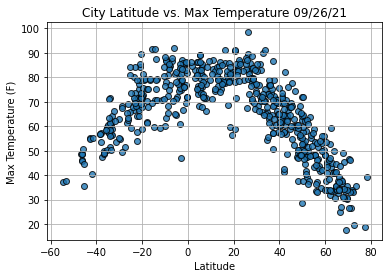

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

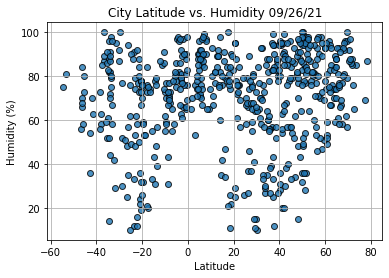

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

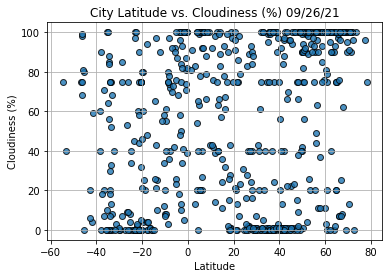

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

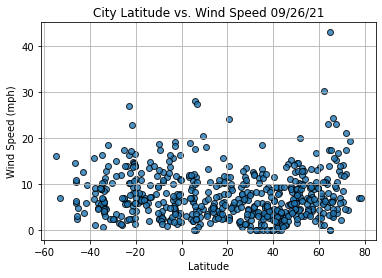

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [14]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
index13 = city_data_df.loc[13]
index13

City                      Aquiraz
Country                        BR
Date          2021-09-26 02:32:46
Lat                       -3.9014
Lng                      -38.3911
Max Temp                    80.69
Humidity                       82
Cloudiness                     18
Wind Speed                  15.66
Name: 13, dtype: object

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

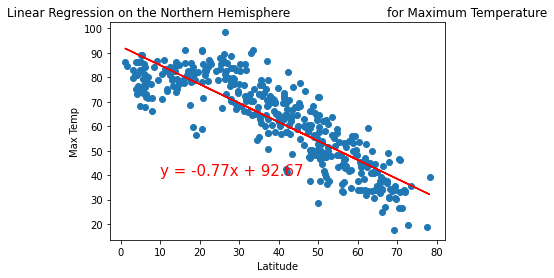

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

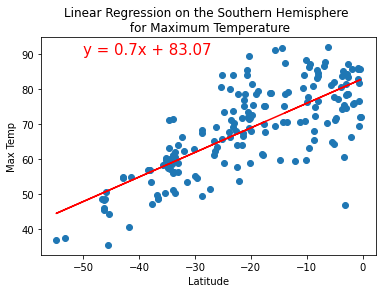

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere. This means that as we approach the equator, 0° latitude, the temperatures become warmer. 

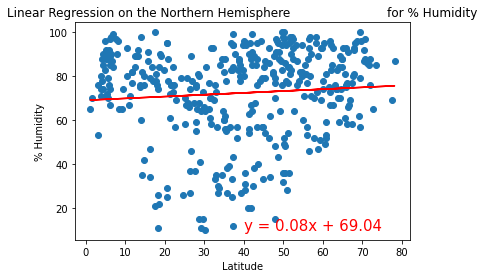

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

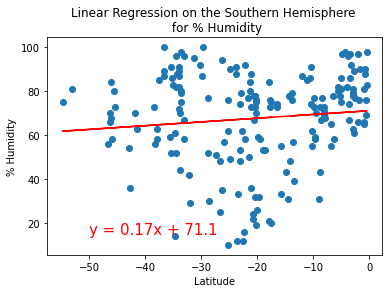

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. 

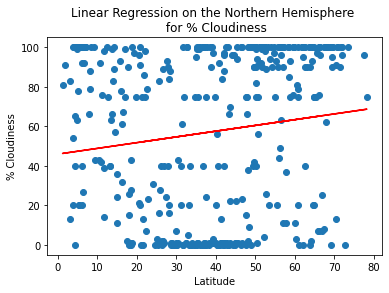

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

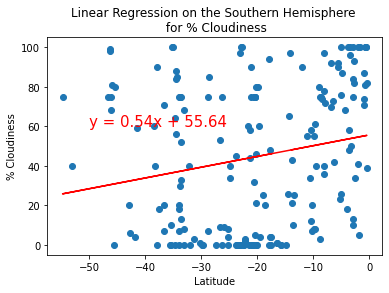

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. 

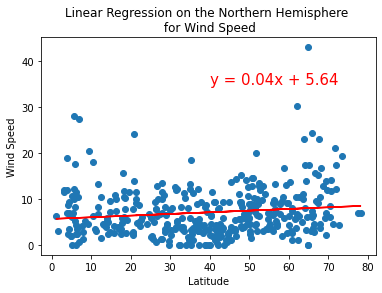

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

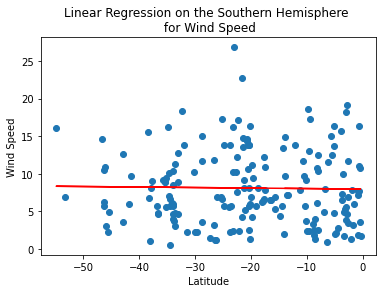

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))




The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 